In [50]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [52]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHF/


In [53]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    assert "Diff" not in f
    if "T_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHF/Ridge_fQuadSinHF_DriftEvalExp_10240NPaths_3906e-03dT_MSEs.parquet


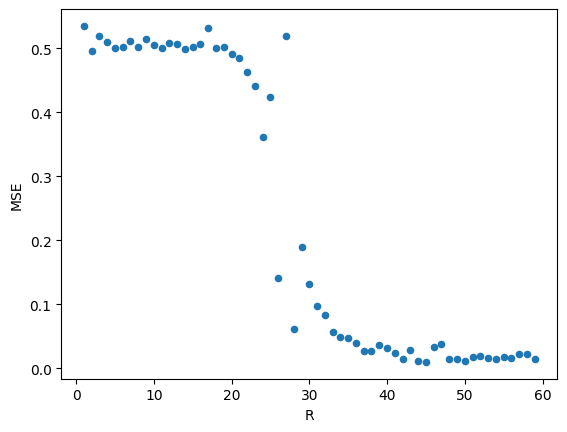

In [54]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [55]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      0.535099
2      0.495184
3      0.519105
4      0.509729
5      0.500004
6      0.502214
7      0.511824
8      0.501445
9      0.515362
10     0.505661
11     0.500310
12     0.508754
13     0.507250
14     0.498251
15     0.502516
16     0.506308
17     0.531279
18     0.499906
19     0.501910
20     0.491626
21     0.485370
22     0.462929
23     0.440548
24     0.361536
25     0.424179
26     0.141817
27     0.519464
28     0.061434
29     0.188992
30     0.131495
31     0.096619
32     0.083990
33     0.056225
34     0.049032
35     0.046739
36     0.039663
37     0.027183
38     0.026664
39     0.037188
40     0.031091
41     0.023520
42     0.014714
43     0.029008
44     0.011523
45     0.009984
46     0.033465
47     0.037472
48     0.014476
49     0.014267
50     0.010894
51     0.016914
52     0.019710
53     0.016843
54     0.015065
55     0.017665
56     0.016554
57     0.022935
58     0.022081
59     0.014681


0    0.009984
Name: 45

In [56]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

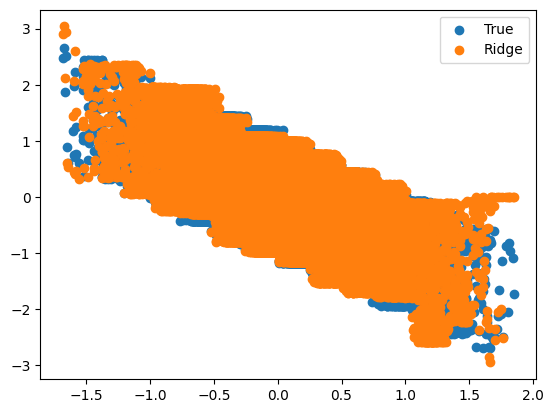

In [57]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()